In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import tree

data = pd.read_csv('/content/Tourism.csv',delimiter=',')

In [ ]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
data[data.duplicated()].count()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [ ]:
data.drop(["CustomerID"],axis=1,inplace=True)

In [ ]:
cat_cols=['ProdTaken','TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting','NumberOfFollowups','ProductPitched','PreferredPropertyStar','MaritalStatus','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','Designation']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
------------------------------
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
3.0    2993
5.0     

In [ ]:
data["Gender"] = data["Gender"].str.replace("Fe Male","Female")
print(data["Gender"].value_counts())

Male      2916
Female    1972
Name: Gender, dtype: int64


In [ ]:
data["MaritalStatus"] = data["MaritalStatus"].str.replace("Unmarried","Single")
print(data["MaritalStatus"].value_counts())

Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [ ]:
data["ProdTaken"] = data["ProdTaken"].astype("category")
data["TypeofContact"] = data["TypeofContact"].astype("category")
data["Occupation"] = data["Occupation"].astype("category")
data["Gender"] = data["Gender"].astype("category")
data["ProductPitched"] = data["ProductPitched"].astype("category")
data["MaritalStatus"] = data["MaritalStatus"].astype("category")
data["Passport"] = data["Passport"].astype("category")
data["OwnCar"] = data["OwnCar"].astype("category")
data["Designation"] = data["Designation"].astype("category")

In [ ]:
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
MaritalStatus                 0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [ ]:
medianFiller = lambda x: x.fillna(x.median())
NaNcolumns = ['DurationOfPitch','MonthlyIncome','Age','NumberOfTrips','NumberOfChildrenVisiting','NumberOfFollowups','PreferredPropertyStar']
print (NaNcolumns)

['DurationOfPitch', 'MonthlyIncome', 'Age', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'NumberOfFollowups', 'PreferredPropertyStar']


In [ ]:
data[NaNcolumns] = data[NaNcolumns].apply(medianFiller,axis=0)

In [ ]:
data.isnull().sum().sort_values(ascending=False)

TypeofContact               25
ProdTaken                    0
PreferredPropertyStar        0
Designation                  0
NumberOfChildrenVisiting     0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
NumberOfTrips                0
MaritalStatus                0
ProductPitched               0
Age                          0
NumberOfFollowups            0
NumberOfPersonVisiting       0
Gender                       0
Occupation                   0
DurationOfPitch              0
CityTier                     0
MonthlyIncome                0
dtype: int64

In [ ]:
data= data.dropna()

In [ ]:
data.isnull().values.any()

False

In [ ]:
def histogram_boxplot(feature, figsize=(7,5), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           )
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet')
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

In [ ]:
def perc_on_bar(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

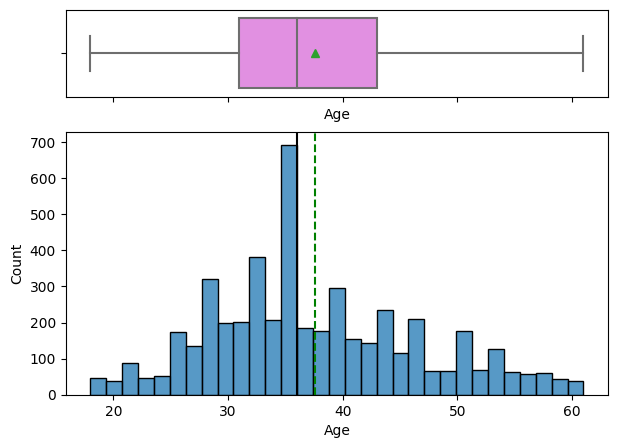

In [ ]:
histogram_boxplot(data["Age"])

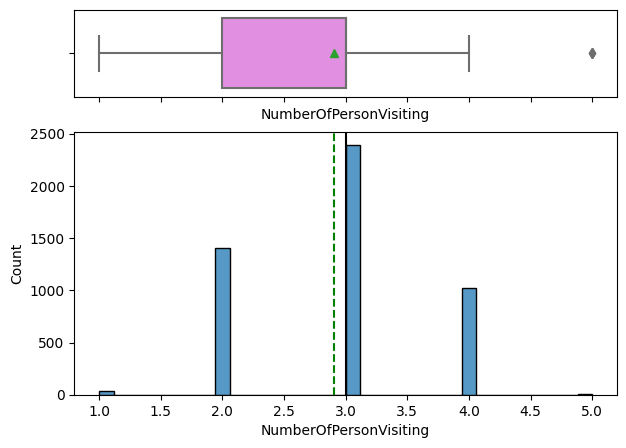

In [ ]:
histogram_boxplot(data["NumberOfPersonVisiting"])

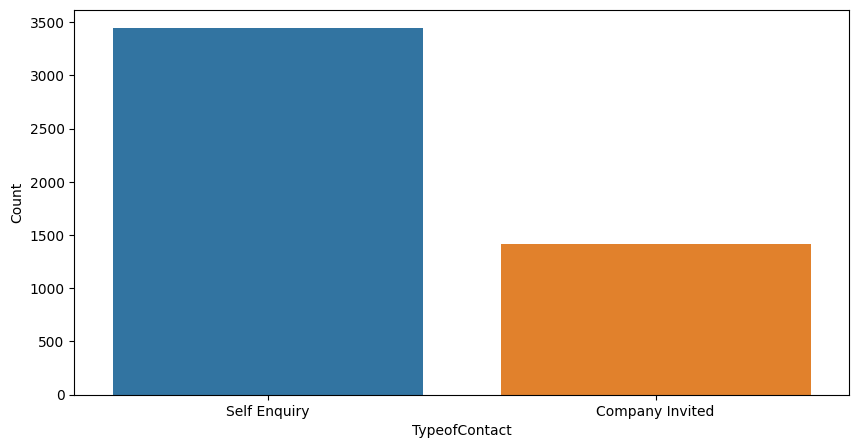

In [ ]:
data = pd.DataFrame(data)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="TypeofContact", data=data, order=data["TypeofContact"].value_counts().index)
plt.xlabel('TypeofContact')
plt.ylabel('Count')

plt.show()


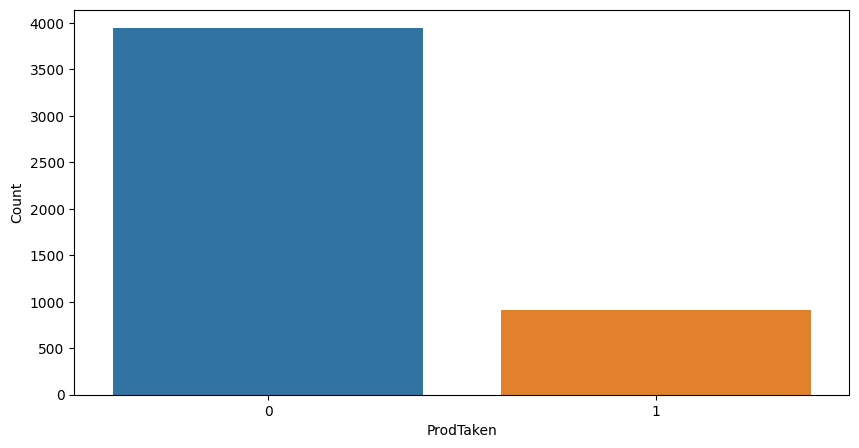

In [ ]:
data = pd.DataFrame(data)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="ProdTaken", data=data, order=data["ProdTaken"].value_counts().index)
plt.xlabel('ProdTaken')
plt.ylabel('Count')

plt.show()


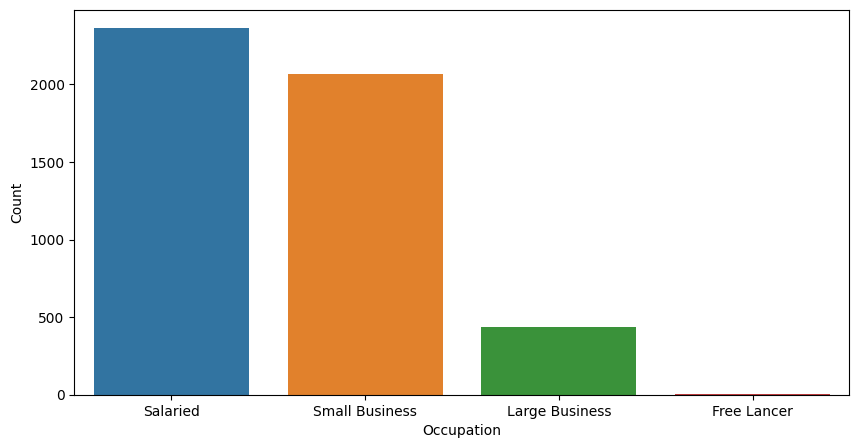

In [ ]:
data = pd.DataFrame(data)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Occupation", data=data, order=data["Occupation"].value_counts().index)
plt.xlabel('Occupation')
plt.ylabel('Count')

plt.show()


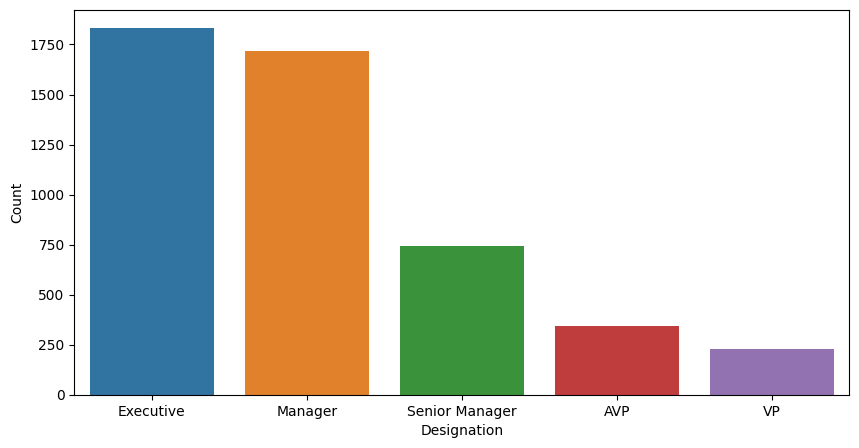

In [ ]:
data = pd.DataFrame(data)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Designation", data=data, order=data["Designation"].value_counts().index)
plt.xlabel('Designation')
plt.ylabel('Count')

plt.show()


<ipython-input-79-fe10f9d12d8d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='rainbow', )


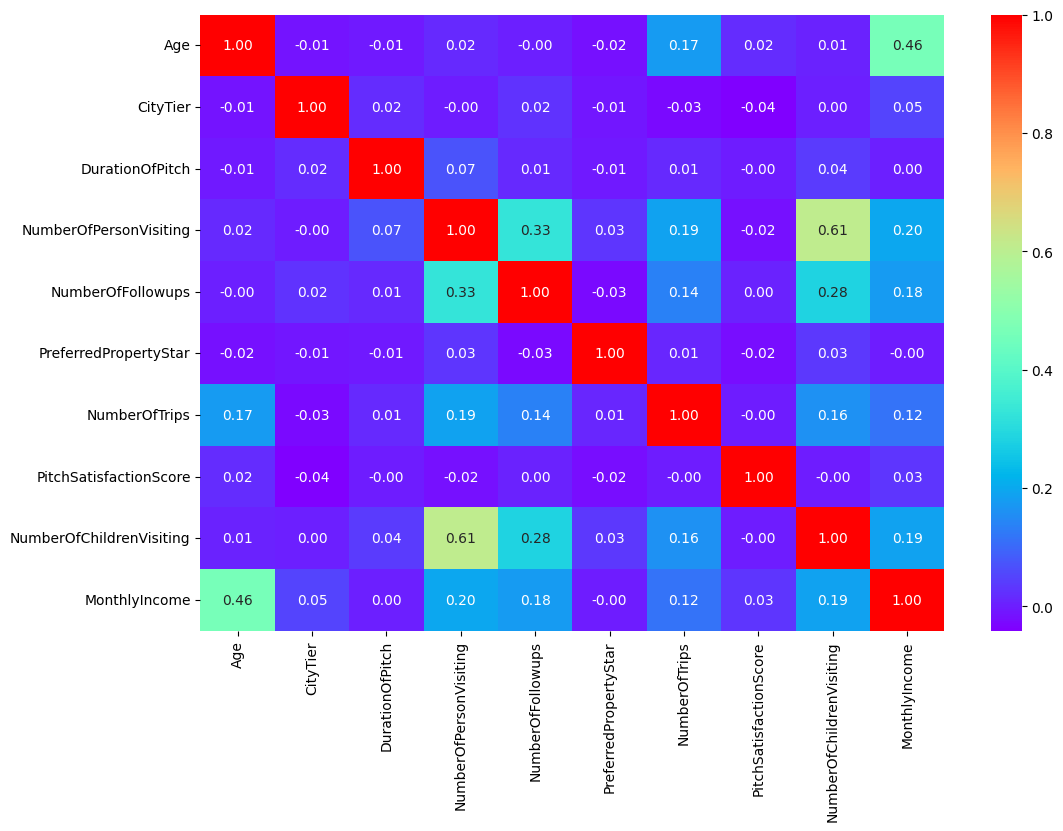

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

In [ ]:
data[data.duplicated()].count()

ProdTaken                   141
Age                         141
TypeofContact               141
CityTier                    141
DurationOfPitch             141
Occupation                  141
Gender                      141
NumberOfPersonVisiting      141
NumberOfFollowups           141
ProductPitched              141
PreferredPropertyStar       141
MaritalStatus               141
NumberOfTrips               141
Passport                    141
PitchSatisfactionScore      141
OwnCar                      141
NumberOfChildrenVisiting    141
Designation                 141
MonthlyIncome               141
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data[data.duplicated()].count()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [ ]:
Y = data["ProdTaken"]
X = data.drop("ProdTaken" , axis=1)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42, stratify=Y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3305, 27) (1417, 27) (3305,) (1417,)


In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
def get_metrics_score(model,flag=True):

    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("f1 score on training set : ",metrics.f1_score(y_train,pred_train))
        print("f1 score on test set : ",metrics.f1_score(y_test,pred_test))


    return score_list

In [ ]:
dtree = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=42)

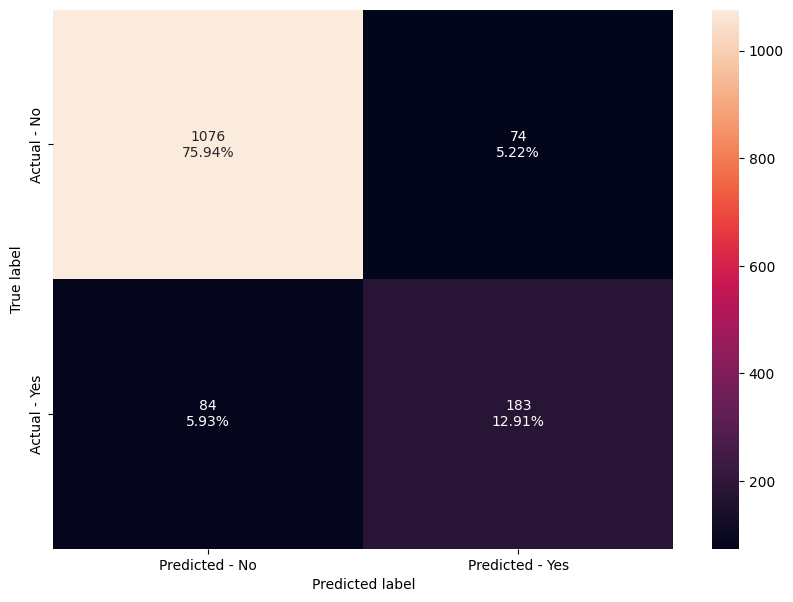

In [ ]:
make_confusion_matrix(dtree,y_test)

In [ ]:
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8884968242766408
Recall on training set :  1.0
Recall on test set :  0.6853932584269663
Precision on training set :  1.0
Precision on test set :  0.7120622568093385
f1 score on training set :  1.0
f1 score on test set :  0.6984732824427481


In [ ]:
rf = RandomForestClassifier(class_weight={0:0.19,1:0.81},random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=42)

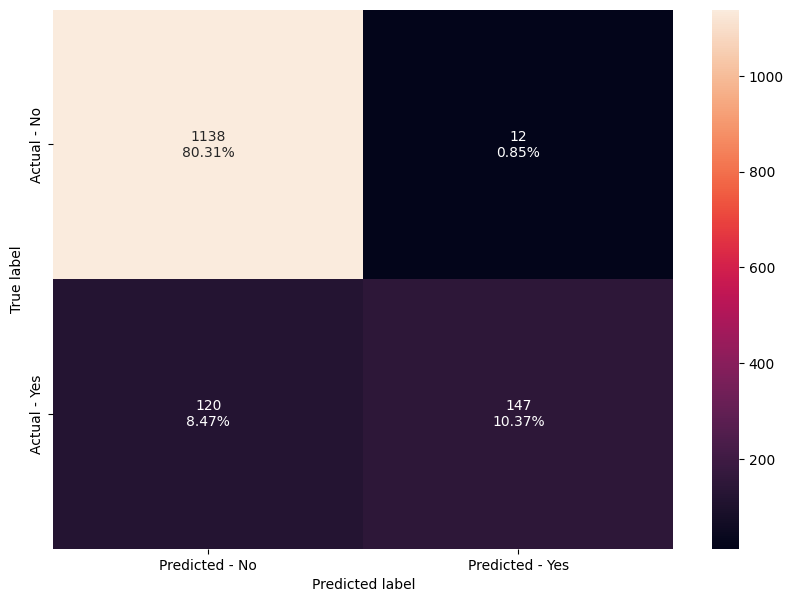

In [ ]:
make_confusion_matrix(rf,y_test)

In [ ]:
rf_score=get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9068454481298518
Recall on training set :  1.0
Recall on test set :  0.550561797752809
Precision on training set :  1.0
Precision on test set :  0.9245283018867925
f1 score on training set :  1.0
f1 score on test set :  0.6901408450704226


In [ ]:
models = [dtree,rf]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []


for model in models:

    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Random Forest'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test})

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
0,Decision Tree,1.0,0.888497,1.0,0.685393,1.0,0.712062,1.0,0.698473
1,Random Forest,1.0,0.906845,1.0,0.550562,1.0,0.924528,1.0,0.690141
